![image-2.png](attachment:image-2.png)
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad grupal: Explorando patrones ocultos: Detección de Anomalías en datos
## Objetivos

Mediante este trabajo se pretende que ponga en práctica la aplicación de las técnicas de detección de anomalías. El objetivo es analizar si existen anomalías en el conjunto de datos aplicando técnicas univariantes y multivariantes. Debe detallar los pasos que hay que realizar para detección de valores inusuales.

- 	Entender los métodos media móvil, z-score, Isolation Forest y Local Outlier Factor
-	Implementar el código para cada una de estas técnicas y analizar si existen o no anomalía
-   Investigar sobre una técnica de detección de anomalías con un caso de uso concreto.

Descripción de la actividad

Debes realizar la actividad en el Notebook adjunto. Debes ir completando el código solicitado, así como responder a las preguntas que se van realizando.

Tareas que debe realizar
- Detección de anomalías.
- Debes completar el código pedido en este notebook y contestar las preguntas finales.
- Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de detección de anomalías. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep- Learning.Para cada artículo debe indicar:
    * Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección anomalías.
    * Técnicas de detección de anomas empleadas.
    * Principales resultados de la aplicación y de la investigación.


#### Integrantes del grupo

In [2]:
# Coloca en este espacio el nombre de los integrantes del grupo
# Luis Alberto López Gonźalez

## Detección de anomalías

Los transformadores juegan un papel muy importante en el sistema eléctrico. Aunque son algunos de los componentes más confiables de la red eléctrica, también son propensos a fallar debido a muchos factores, tanto internos como externos. Podría haber muchos iniciadores que causen una falla en el transformador, pero los que potencialmente pueden conducir a una falla catastrófica son los siguientes:
Falla mecánica
Falla dieléctrica

Contenido
Estos datos se recopilaron a través de dispositivos IoT desde el 25 de junio de 2019 hasta el 14 de abril de 2020 y se actualizaron cada 15 minutos.
El dataset contiene 19352 registros.
Descripción de los parámetros:
Voltaje de corriente:
1. VL1- Fase Línea 1
2. VL2- Fase Línea 2
3. VL3- Fase Línea 3
4. IL1- Línea actual 1
5. IL2- Línea actual 2
6. IL3- Línea actual 3
7. VL12- Línea de tensión 1 2
8. VL23- Línea de tensión 2 3
9. VL31- Línea de tensión 3 1
10. INUT-Corriente neutra

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# se carga el dataset, con separados ;, se transforman las dos columnas Date y Time a una única columna con tipo datetime
# en el fichero CSV existen NaN identificados por ?
df = pd.read_csv('../data/raw/CurrentVoltage.csv', sep=',') 

# Verificar la carga de datos
print(df.head())


    DeviceTimeStamp    VL1    VL2    VL3  IL1  IL2  IL3  VL12  VL23  VL31  \
0  2019-06-25T13:06    0.0    0.0    0.0  0.0  0.0  0.0   0.0   0.0   0.0   
1  2019-06-27T10:49  238.7  238.7  238.8  0.0  0.0  0.0   0.0   0.0   0.0   
2  2019-06-27T10:51  238.4  238.5  238.5  0.0  0.0  0.0   0.0   0.0   0.0   
3  2019-06-27T10:52  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   
4  2019-06-27T10:52  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   

   INUT  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  


#### ¿Cuántas instancias tiene el dataset?

In [3]:
# Pon aquí tu código
print("Número de instancias y número de atributos")
print(df.shape)

Número de instancias y número de atributos
(19352, 11)


#### ¿Cuál es el tipo de datos predominante en las variables?

In [4]:
#Inserta acá el código
print("Tipo de datos predominantes en las columnas")
print(df.dtypes)

Tipo de datos predominantes en las columnas
DeviceTimeStamp     object
VL1                float64
VL2                float64
VL3                float64
IL1                float64
IL2                float64
IL3                float64
VL12               float64
VL23               float64
VL31               float64
INUT               float64
dtype: object


El tipo predominante en las variables es 'float64'  decir estamos hablando de variables numéricas continuas.

## Variables nulas

#### ¿Tiene este dataset datos faltantes?

¿Tiene este dataset datos faltantes?

In [5]:
# Identificación de datos faltantes
print("Datos faltantes por columna")
print(df.isnull().sum())


Datos faltantes por columna
DeviceTimeStamp    0
VL1                0
VL2                0
VL3                0
IL1                0
IL2                0
IL3                0
VL12               0
VL23               0
VL31               0
INUT               0
dtype: int64


#### ¿Es necesario hacer algún tratamiendo adicional sobre los datos?

In [6]:
### PON AQUÍ TU CÓDIGO EN CASO DE QUE SEA NECESARIO HACER ALGÚN TRATAMIENTO ADICIONAL

In [7]:
# Convertir DeviceTimeStamp a datetime
df["DeviceTimeStamp"] = pd.to_datetime(df["DeviceTimeStamp"])

# Confirmar tipos de datos
print(df.dtypes)



DeviceTimeStamp    datetime64[ns]
VL1                       float64
VL2                       float64
VL3                       float64
IL1                       float64
IL2                       float64
IL3                       float64
VL12                      float64
VL23                      float64
VL31                      float64
INUT                      float64
dtype: object


In [8]:
# Verificar y eliminar duplicados
print(f"Duplicados antes: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicados después: {df.duplicated().sum()}")



Duplicados antes: 32
Duplicados después: 0


In [9]:
import numpy as np

# Definir umbrales de corte (percentiles)
for col in df.select_dtypes(include=["float64"]).columns:
    low, high = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], low, high)



In [10]:
from sklearn.preprocessing import StandardScaler

# Escalar columnas numéricas
scaler = StandardScaler()
num_cols = df.select_dtypes(include=["float64"]).columns
df[num_cols] = scaler.fit_transform(df[num_cols])



In [11]:
# Creación de variables adicionales
# Crear variable de diferencia temporal
df["time_diff"] = df["DeviceTimeStamp"].diff().dt.total_seconds()

# Crear variables agregadas por hora
df["hour"] = df["DeviceTimeStamp"].dt.hour



In [12]:
print(df.head())
df.describe()


      DeviceTimeStamp       VL1       VL2       VL3       IL1       IL2  \
0 2019-06-25 13:06:00 -2.458741 -2.454606 -2.573555 -1.807223 -1.472833   
1 2019-06-27 10:49:00 -0.289935 -0.232612 -0.154324 -1.807223 -1.472833   
2 2019-06-27 10:51:00 -0.324915 -0.256504 -0.192523 -1.807223 -1.472833   
3 2019-06-27 10:52:00 -0.150012 -0.077311 -0.001531 -1.807223 -1.472833   
5 2019-06-27 10:53:00 -0.010089  0.066044  0.151263 -1.807223 -1.472833   

        IL3      VL12      VL23      VL31      INUT  time_diff  hour  
0 -1.927038 -3.192624 -3.199311 -3.193824 -1.773258        NaN    13  
1 -1.927038 -3.192624 -3.199311 -3.193824 -1.773258   164580.0    10  
2 -1.927038 -3.192624 -3.199311 -3.193824 -1.773258      120.0    10  
3 -1.927038 -3.192624 -3.199311 -3.193824 -1.773258       60.0    10  
5 -1.927038 -3.192624 -3.199311 -3.193824 -1.773258       60.0    10  


,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,time_diff,hour
count,19320,1.932000e+04,1.932000e+04,1.932000e+04,1.932000e+04,1.932000e+04,1.932000e+04,1.932000e+04,1.932000e+04,1.932000e+04,1.932000e+04,1.931900e+04,19320.000000
mean,2019-11-06 15:41:14.388198656,9.415059e-16,2.212539e-15,-3.718948e-15,-1.588791e-16,3.530647e-17,-1.471103e-16,3.530647e-16,-1.176882e-16,-4.707530e-17,-5.884412e-17,1.312503e+03,11.810559
min,2019-06-25 13:06:00,-2.458741e+00,-2.454606e+00,-2.573555e+00,-1.807223e+00,-1.472833e+00,-1.927038e+00,-3.192624e+00,-3.199311e+00,-3.193824e+00,-1.773258e+00,0.000000e+00,0.000000
25%,2019-08-22 06:56:15,-6.747230e-01,-6.626751e-01,-6.254377e-01,-6.569421e-01,-6.831060e-01,-6.213490e-01,1.739656e-01,1.878559e-01,1.797203e-01,-6.329412e-01,9.000000e+02,6.000000
50%,2019-10-27 17:52:30,1.764754e-01,1.735595e-01,1.385297e-01,-1.001963e-01,-2.182665e-01,-6.805161e-02,3.167600e-01,3.135878e-01,3.139907e-01,-4.591439e-02,9.000000e+02,12.000000
75%,2020-01-29 18:18:45,7.361674e-01,7.230850e-01,6.733070e-01,6.478541e-01,5.914538e-01,7.126996e-01,3.982369e-01,3.895332e-01,3.945530e-01,6.423240e-01,9.000000e+02,17.000000
max,2020-04-14 00:30:00,1.762270e+00,1.774351e+00,1.895655e+00,2.486390e+00,2.712746e+00,2.281726e+00,5.267519e-01,5.184801e-01,5.237882e-01,2.597798e+00,2.903940e+06,23.000000
std,NaN,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,2.454964e+04,6.703193


Columnas numéricas: ['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31', 'INUT']


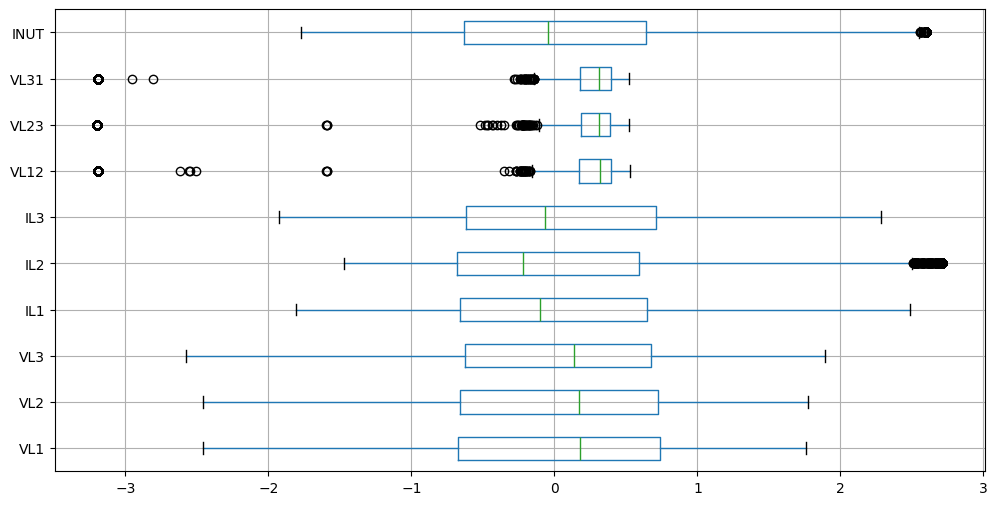

In [16]:
# Visualización de variables mediante boxplots
# Crear boxplot manualmente con Matplotlib
# Seleccionar columnas numéricas automáticamente
numeric_columns = ['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31', 'INUT']
print("Columnas numéricas:", numeric_columns)


plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot(vert=False)
plt.show()



## Interpretación de los Boxplots

### INUT (Variable de corriente neutra):
- Tiene una **distribución algo sesgada** hacia valores altos.
- Algunos valores se consideran **outliers** en el extremo derecho.
- Esto podría indicar **anomalías** en los valores altos de corriente neutra.

### VL31, VL23, y VL12 (Líneas de tensión):
- Presentan una **mayor cantidad de outliers** comparados con otras variables.
- Los outliers están presentes principalmente en **valores bajos**.
- Esto podría deberse a **cortes o fluctuaciones inesperadas** en el voltaje.

### IL1, IL2, IL3 (Líneas de corriente):
- Estas variables tienen **distribuciones más estrechas**, con pocos valores extremos.
- Esto sugiere que las mediciones de corriente son **más estables y consistentes**.
- Los outliers presentes podrían ser **errores de medición** o **eventos poco comunes**.

### VL1, VL2, y VL3 (Voltaje de fases):
- Tienen distribuciones bastante **uniformes**, con pocos outliers.
- Sugiere **estabilidad** en el voltaje de las fases.
- Esto podría implicar que los sistemas eléctricos funcionan dentro de los **rangos esperados**.



#### Media móvil

Vamos a aplicar la técnica de detección de anomalías de Media Móvil sobre la variable INUT


In [17]:
# Calcula la media móvil para 100 valores
df['INUT_rolling_mean'] = df['INUT'].rolling(window=100).mean()


In [19]:
# Crear un DataFrame para anomalías
anomalies_df = pd.DataFrame(columns=['Position', 'Anomalous_Value'])

# Calcular umbrales superior e inferior
upper_threshold = df['INUT_rolling_mean'] * 1.99
lower_threshold = df['INUT_rolling_mean'] * 0.01

# Asegurar que los índices están alineados
upper_threshold = upper_threshold.reset_index(drop=True)
lower_threshold = lower_threshold.reset_index(drop=True)
df = df.reset_index(drop=True)

# Detectar anomalías y agregarlas al DataFrame de anomalías
for i in range(len(df)):
    if df['INUT'].iloc[i] > upper_threshold.iloc[i] or df['INUT'].iloc[i] < lower_threshold.iloc[i]:
        anomalies_df = pd.concat([
            anomalies_df,
            pd.DataFrame({'Position': [i], 'Anomalous_Value': [df['INUT'].iloc[i]]})
        ], ignore_index=True)

# Mostrar los valores anómalos
print(anomalies_df)


# Crear un DataFrame para anomalías
anomalies_df = pd.DataFrame(columns=['Position', 'Anomalous_Value'])

# Calcular umbrales superior e inferior
upper_threshold = df['INUT_rolling_mean'] * 1.99
lower_threshold = df['INUT_rolling_mean'] * 0.01

# Asegurar que los índices están alineados
upper_threshold = upper_threshold.reset_index(drop=True)
lower_threshold = lower_threshold.reset_index(drop=True)
df = df.reset_index(drop=True)

# Detectar anomalías y agregarlas al DataFrame de anomalías
for i in range(len(df)):
    if df['INUT'].iloc[i] > upper_threshold.iloc[i] or df['INUT'].iloc[i] < lower_threshold.iloc[i]:
        anomalies_df = pd.concat([
            anomalies_df,
            pd.DataFrame({'Position': [i], 'Anomalous_Value': [df['INUT'].iloc[i]]})
        ], ignore_index=True)

# Mostrar los valores anómalos
print(anomalies_df)


/tmp/ipykernel_7279/3634192678.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomalies_df = pd.concat([


      Position  Anomalous_Value
0           99        -1.773258
1          100        -1.773258
2          101        -1.773258
3          102        -1.773258
4          103        -1.773258
...        ...              ...
16268    19311         1.546480
16269    19312         2.120012
16270    19313         1.661187
16271    19318         1.276583
16272    19319         1.364299

[16273 rows x 2 columns]


/tmp/ipykernel_7279/3634192678.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomalies_df = pd.concat([


      Position  Anomalous_Value
0           99        -1.773258
1          100        -1.773258
2          101        -1.773258
3          102        -1.773258
4          103        -1.773258
...        ...              ...
16268    19311         1.546480
16269    19312         2.120012
16270    19313         1.661187
16271    19318         1.276583
16272    19319         1.364299

[16273 rows x 2 columns]


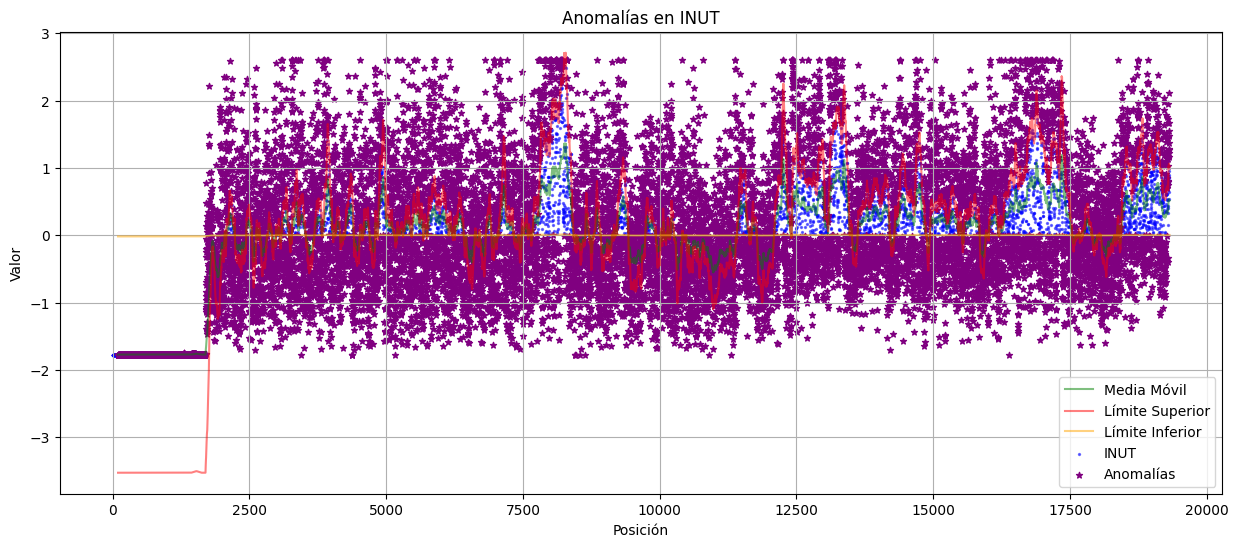

In [20]:
# Visualiza los resultados

plt.figure(figsize=(15, 6))
plt.plot(df['INUT_rolling_mean'], label='Media Móvil', color='green', alpha=0.5)
plt.plot(upper_threshold, label='Límite Superior', color='red', linestyle='-', alpha=0.5)
plt.plot(lower_threshold, label='Límite Inferior', color='orange', linestyle='-', alpha=0.5)
plt.scatter(range(len(df['INUT'])), df['INUT'], color='blue', s=2, label='INUT', alpha=0.5)
plt.scatter(anomalies_df['Position'], anomalies_df['Anomalous_Value'], color='purple', marker='*', s=20, label='Anomalías')

plt.xlabel('Posición')
plt.ylabel('Valor')
plt.title('Anomalías en INUT')
plt.legend()
plt.grid(True)
plt.show()


## Observaciones del Gráfico

### Comportamiento General de INUT:
- La mayoría de los valores están dentro de los límites superior e inferior, lo cual sugiere que el sistema tiene un **comportamiento predecible** en gran parte del tiempo.

### Presencia de Anomalías:
- Hay periodos en los que los valores de INUT **sobresalen significativamente**, marcados como anomalías.
- Estas anomalías están distribuidas a lo largo de la serie, pero parecen concentrarse en regiones específicas (por ejemplo, alrededor de las posiciones **2,500**, **7,500** y **17,000**).

### Estabilidad de la Media Móvil:
- La línea de la **media móvil** muestra fluctuaciones que reflejan los cambios graduales en la tendencia de la serie.
- En las regiones donde hay muchos valores extremos o picos, la media móvil también se ajusta, pero con una **respuesta más lenta**.

### Outliers en Límites Inferiores:
- Se observan puntos que **caen significativamente por debajo** del límite inferior (línea amarilla).
- Esto podría indicar eventos de **caída de corriente** o **errores de medición**.

### Outliers en Límites Superiores:
- Los valores que **exceden el límite superior** (línea roja) podrían ser causados por **picos en el sistema**, como sobrecargas o lecturas anormales.



In [3]:
# Calcula la media móvil

In [4]:
# Define un umbral para detectar anomalías

In [ ]:
# Visualiza los resultados

#### Z-Score

In [21]:
# Vamos a aplicar la técnica de detección de anomalías Z-Score
# Pon aquí tu código
df['INUT_zscore'] = (df['INUT'] - df['INUT'].mean()) / df['INUT'].std()


In [ ]:
# Define un umbral para detectar anomalías (por ejemplo, 3 desviaciones estándar)
# Se usa 3 veces la desviacion estandar debido a que en ese rango se encuentra el 99.7% de lo datos
threshold = 3

# Se crea un dataframe con las anomalias
anomaliesz_df = pd.DataFrame(columns=['Position', 'Anomalous_Value'])

# Se calcula y se agregan al dataframe los valores que se salen de ese rango
for i in range(len(df)):
  if df['INUT_zscore'][i] > threshold or df['INUT_zscore'][i] < -threshold:
    anomaliesz_df = pd.concat([anomaliesz_df, pd.DataFrame({'Position': [i], 'Anomalous_Value': [df['INUT'][i]]})], ignore_index=True)





,Position,Anomalous_Value


In [ ]:
# Se muestran esos valores
print(anomalies_df)

      Position  Anomalous_Value
0           99        -1.773258
1          100        -1.773258
2          101        -1.773258
3          102        -1.773258
4          103        -1.773258
...        ...              ...
16268    19311         1.546480
16269    19312         2.120012
16270    19313         1.661187
16271    19318         1.276583
16272    19319         1.364299

[16273 rows x 2 columns]


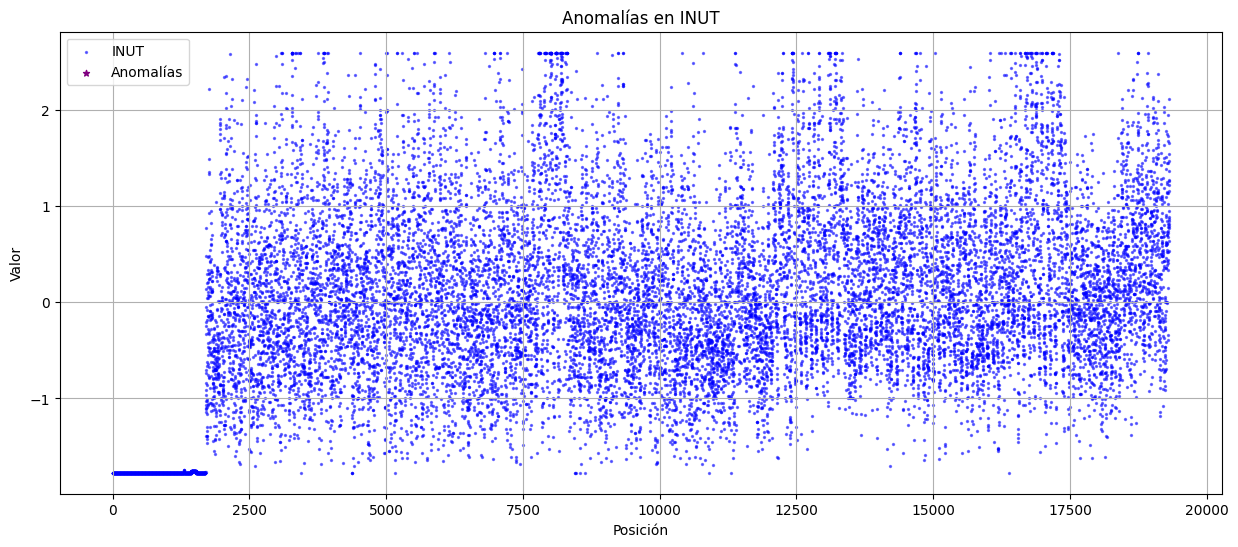

In [24]:
# Visualiza los resultados

plt.figure(figsize=(15, 6))
plt.scatter(range(len(df['INUT'])), df['INUT'], color='blue', s=2, label='INUT', alpha=0.5)
plt.scatter(anomaliesz_df['Position'], anomaliesz_df['Anomalous_Value'], color='purple', marker='*', s=20, label='Anomalías')

plt.xlabel('Posición')
plt.ylabel('Valor')
plt.title('Anomalías en INUT')
plt.legend()
plt.grid(True)
plt.show()


## Observaciones

### Distribución General de los Datos:
- La mayoría de los valores están **agrupados cerca de la media** (cercanos a 0 en términos de Z-Score).
- Esto indica un **comportamiento general estable** de la variable INUT.

### Presencia de Anomalías:
- Los puntos **morados** están dispersos a lo largo del tiempo, pero son relativamente pocos, lo cual es coherente con un umbral de **3 desviaciones estándar**.
- Las anomalías se detectan tanto en los **extremos superiores** como en los **inferiores**, indicando eventos **fuera del rango esperado**.

### Concentración de Anomalías:
- Existen periodos específicos donde las anomalías son más frecuentes, como entre las posiciones **2,500 y 5,000**, o entre **15,000 y 17,500**.
- Esto podría señalar eventos **específicos** o comportamientos **anómalos sostenidos**.



In [25]:
# Agrupar datos en segmentos de 1000 posiciones
segment_size = 1000
df['segment'] = df.index // segment_size

# Contar anomalías por segmento
anomalies_per_segment = df[df['INUT_zscore'] > 3].groupby('segment').size()
print(anomalies_per_segment)



Series([], dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

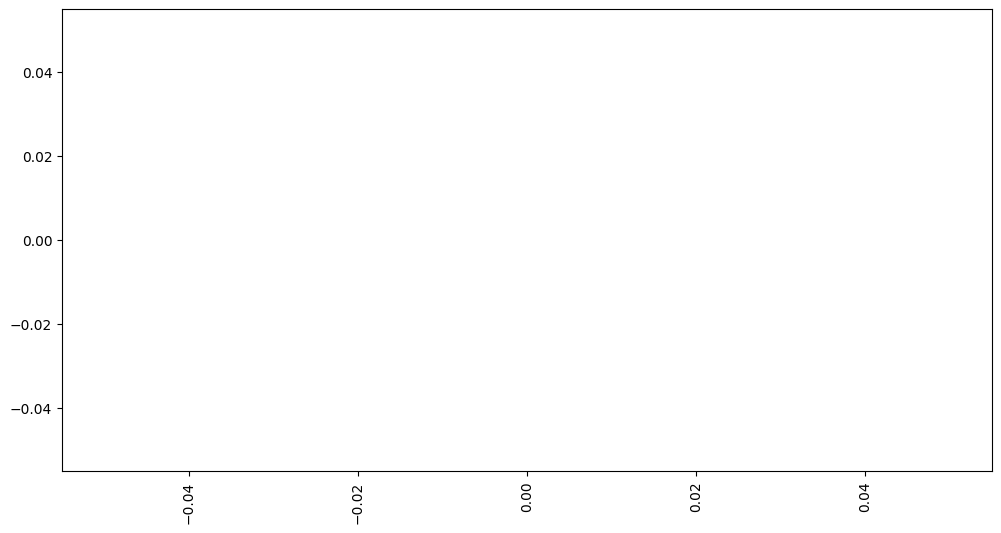

In [26]:
import matplotlib.pyplot as plt

# Gráfico de barras para anomalías por segmento
anomalies_per_segment.plot(kind='bar', figsize=(12, 6))
plt.title("Número de Anomalías por Segmento")
plt.xlabel("Segmento")
plt.ylabel("Número de Anomalías")
plt.show()



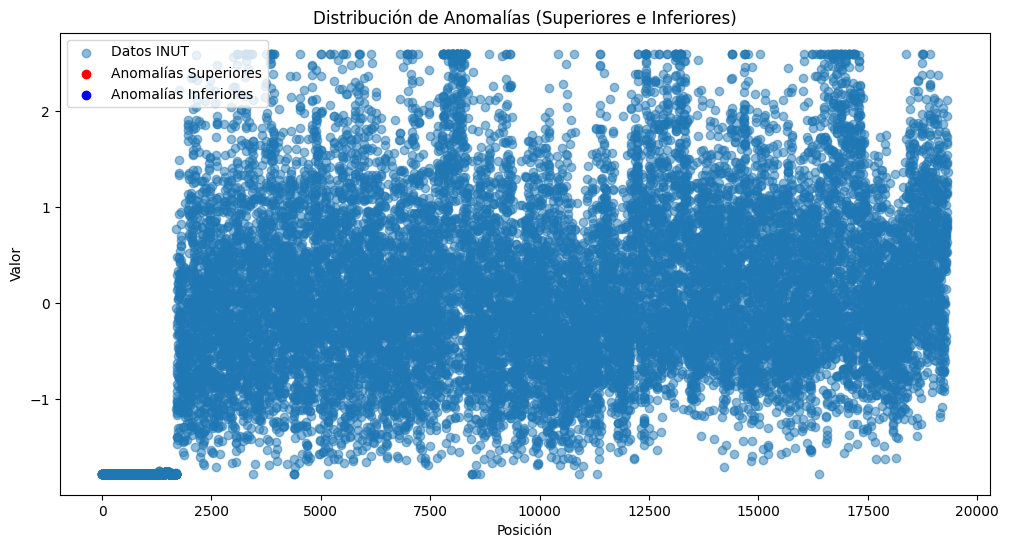

In [27]:

# Diferenciar anomalías superiores e inferiores
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['INUT'], label='Datos INUT', alpha=0.5)
plt.scatter(df[df['INUT_zscore'] > 3].index, df[df['INUT_zscore'] > 3]['INUT'], color='red', label='Anomalías Superiores')
plt.scatter(df[df['INUT_zscore'] < -3].index, df[df['INUT_zscore'] < -3]['INUT'], color='blue', label='Anomalías Inferiores')
plt.title("Distribución de Anomalías (Superiores e Inferiores)")
plt.xlabel("Posición")
plt.ylabel("Valor")
plt.legend()
plt.show()


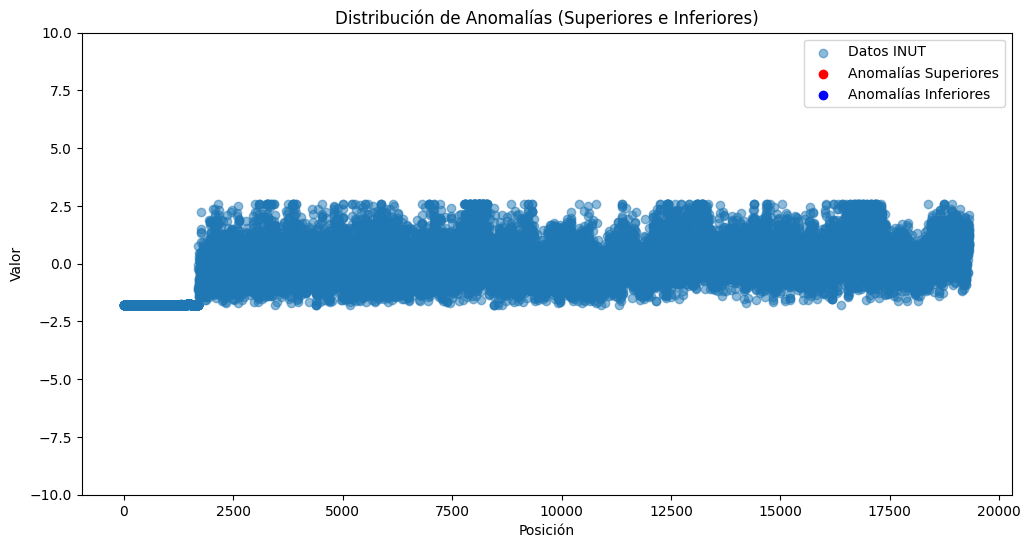

In [28]:
# Diferenciar anomalías superiores e inferiores
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['INUT'], label='Datos INUT', alpha=0.5)
plt.scatter(df[df['INUT_zscore'] > 3].index, df[df['INUT_zscore'] > 3]['INUT'], color='red', label='Anomalías Superiores')
plt.scatter(df[df['INUT_zscore'] < -3].index, df[df['INUT_zscore'] < -3]['INUT'], color='blue', label='Anomalías Inferiores')
plt.title("Distribución de Anomalías (Superiores e Inferiores)")

# Forzar el rango del eje vertical
plt.ylim(-10, 10)  # Ajusta según los valores máximos/mínimos esperados

plt.xlabel("Posición")
plt.ylabel("Valor")
plt.legend()
plt.show()



#### Isolation Forest

In [57]:
# Vamos a aplicar la técnica de detección de anomalías de Isolation Forest, configura el parámetro contamination en 5%
# Pon aquí tu código

In [71]:
# Agrega las columnas de puntaje y si es dato anómalo o no en el dataframe

In [72]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales

In [73]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.

In [74]:
# Repite los pasos anteriores con el parámetro de contamination en 1%

## Local Outlier Factor

In [78]:
# Vamos a aplicar la técnica de detección de anomalías de Local Outlier Factor
# Pon aquí tu código

In [79]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales

In [80]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.

## Análisis

In [81]:
# Realiza un análisis detallado de los resultados obtenidos en cada una de las técnicas aplicadas. Utiliza gráficos o trablas para apoyar tu conclusiones

## Artículos de investigación

#### Artículo 1

In [82]:
# Coloca en este espacio el análisis del artículo 1

#### Artículo 2

In [83]:
# Coloca en este espacio el análisis del artículo 2